In [128]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [129]:
df = pd.read_csv("https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/appliance_energy_usage.csv", index_col= 'date',parse_dates=True)

In [130]:
df.head()
## every 10 min data

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,60,30,6.600000,733.5,92.0,7.000000,5.3,63.000000
2016-01-11 17:10:00,60,30,6.483333,733.6,92.0,6.666667,5.2,59.166667
2016-01-11 17:20:00,50,30,6.366667,733.7,92.0,6.333333,5.1,55.333333
2016-01-11 17:30:00,50,40,6.250000,733.8,92.0,6.000000,5.0,51.500000
2016-01-11 17:40:00,60,40,6.133333,733.9,92.0,5.666667,4.9,47.666667


In [131]:
df = df.resample('1H').mean()

C:\Users\Pratyush.Thakur\AppData\Local\Temp\ipykernel_6036\2693540275.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('1H').mean()


In [132]:
df.head()

,Appliances,lights,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Visibility
date,,,,,,,,
2016-01-11 17:00:00,55.000000,35.000000,6.308333,733.750000,92.000000,6.166667,5.050000,53.416667
2016-01-11 18:00:00,176.666667,51.666667,5.941667,734.266667,91.583333,5.416667,4.658333,40.000000
2016-01-11 19:00:00,173.333333,25.000000,6.000000,734.791667,89.750000,6.000000,4.391667,40.000000
2016-01-11 20:00:00,125.000000,35.000000,6.000000,735.283333,87.583333,6.000000,4.016667,40.000000
2016-01-11 21:00:00,103.333333,23.333333,5.833333,735.566667,87.416667,6.000000,3.816667,40.000000


In [133]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan"
]


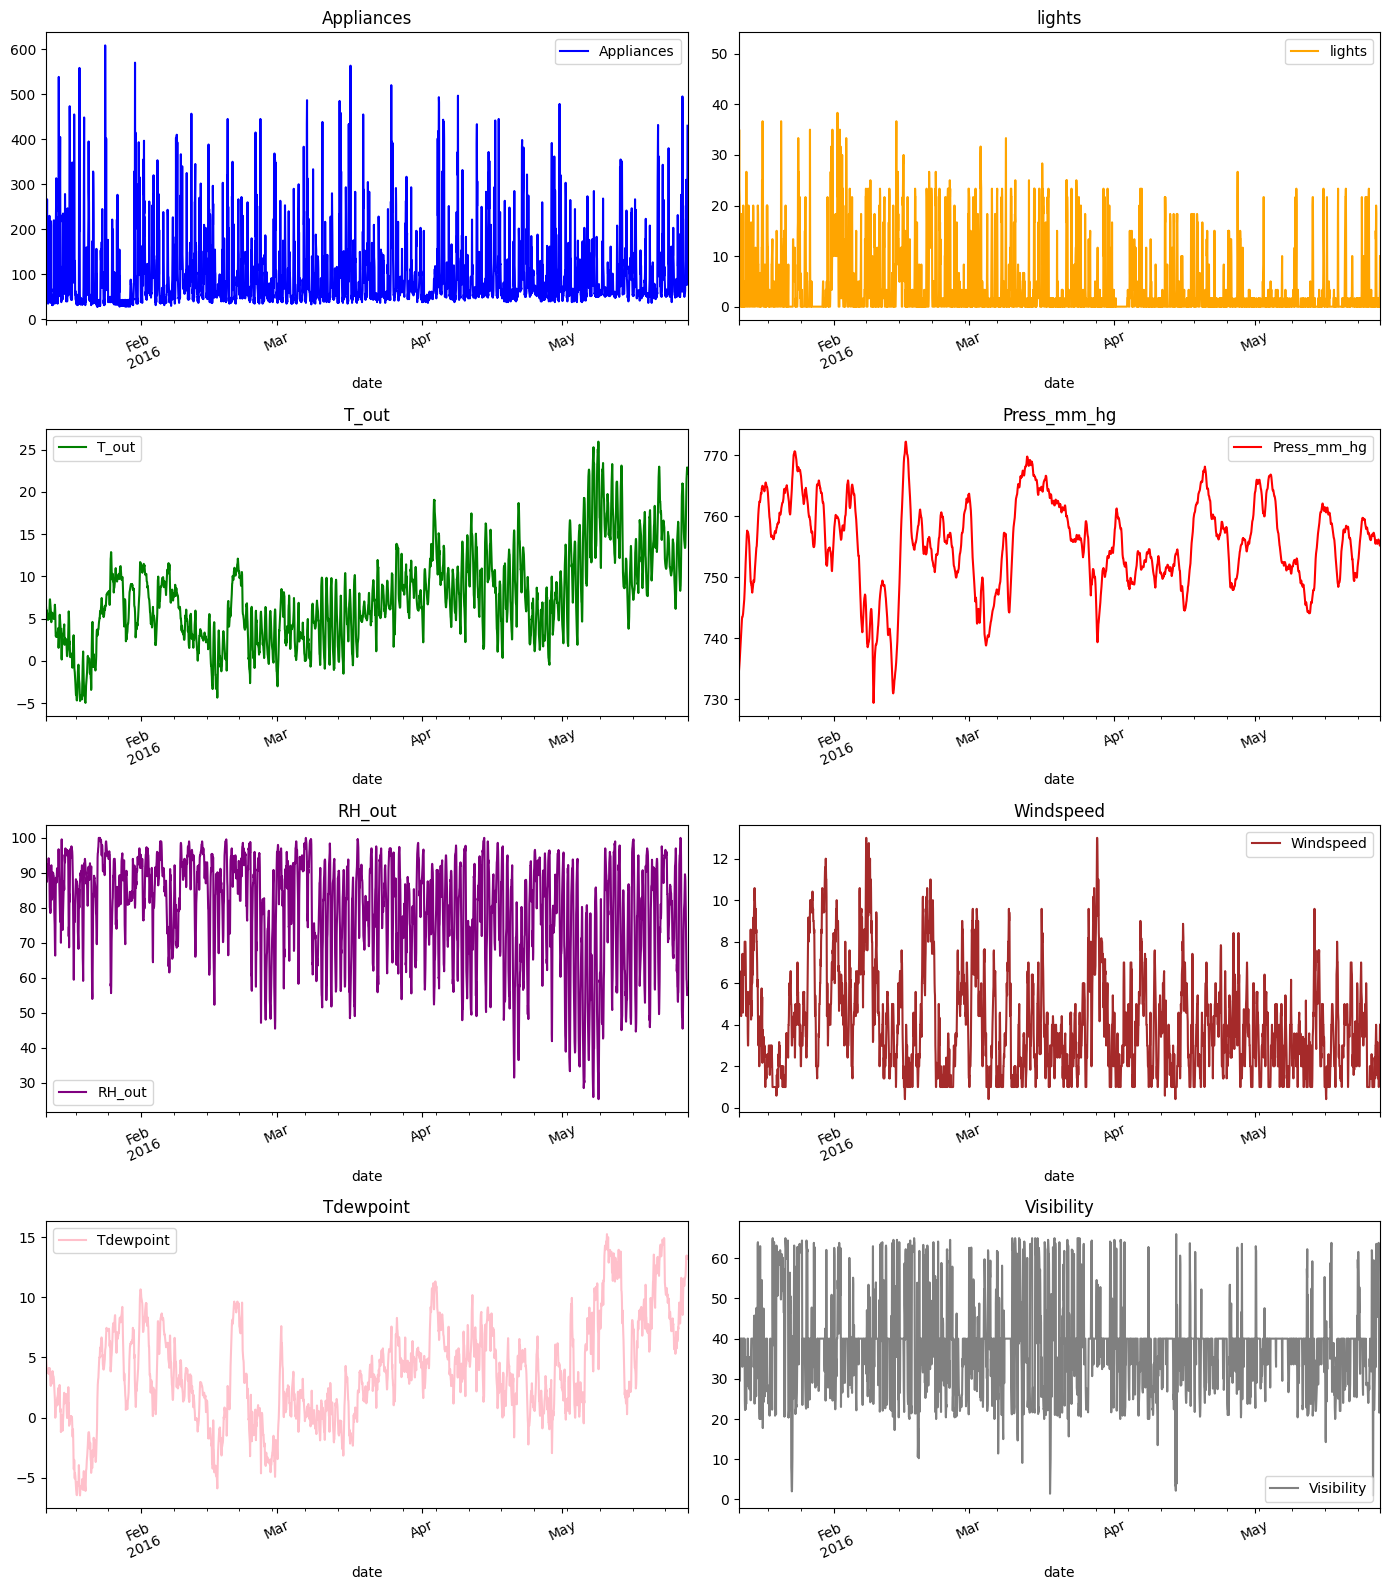

In [134]:
def visualize(data):
    features = list(df.select_dtypes(include = [np.number]).columns.values)
    # take only numeric features
    feature_size = len(features)
    fig, axes = plt.subplots(
        nrows = int(np.ceil(feature_size/2)), ncols= 2,figsize = (14,feature_size*2), dpi = 100,facecolor = 'w', edgecolor = 'k'  
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i% (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax = axes[i //2, i%2],
            color = c,
            title = "{}".format(key),
            rot = 25
        )
        ax.legend([key])
        plt.tight_layout()
visualize(df)

In [135]:
for i in range(len(df.columns)):
    result = adfuller(df[df.columns[i]])
    if result[1] > 0.05:
    # p value at index 1
        print("{} - series is not stationary".format(df.columns[i]))
    else:
        print("{} - series is stationary".format(df.columns[i]))

Appliances - series is stationary
lights - series is stationary
T_out - series is stationary
Press_mm_hg - series is stationary
RH_out - series is stationary
Windspeed - series is stationary
Tdewpoint - series is stationary
Visibility - series is stationary


In [136]:
df.columns

Index(['Appliances', 'lights', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Tdewpoint', 'Visibility'],
      dtype='object')

In [137]:
df[df.columns[0]]

date
2016-01-11 17:00:00     55.000000
2016-01-11 18:00:00    176.666667
2016-01-11 19:00:00    173.333333
2016-01-11 20:00:00    125.000000
2016-01-11 21:00:00    103.333333
                          ...    
2016-05-27 14:00:00    101.666667
2016-05-27 15:00:00     76.666667
2016-05-27 16:00:00    135.000000
2016-05-27 17:00:00    180.000000
2016-05-27 18:00:00    430.000000
Freq: h, Name: Appliances, Length: 3290, dtype: float64

In [138]:
## getting relevant features

In [139]:
max_lags = 8
y = 'Appliances'

In [140]:
for i in range(len(df.columns)-1):
    results = grangercausalitytests(df[[y, df.columns[i+1]]], max_lags, verbose= False)
    ## i+1 since first column is the y itseld 
    p_values = [round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]
    print("colums ={}: p_values -{}".format(df.columns[i+1],p_values))

colums =lights: p_values -[0.1451, 0.0005, 0.0001, 0.0002, 0.0001, 0.0001, 0.0006, 0.0012]
colums =T_out: p_values -[0.002, 0.0001, 0.0001, 0.0, 0.0, 0.0, 0.0, 0.0]
colums =Press_mm_hg: p_values -[0.0985, 0.1956, 0.0351, 0.0016, 0.0, 0.0001, 0.0, 0.0]


c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


colums =RH_out: p_values -[0.0, 0.0004, 0.0004, 0.0, 0.0, 0.0, 0.0, 0.0]
colums =Windspeed: p_values -[0.0004, 0.0041, 0.0094, 0.0082, 0.0163, 0.0119, 0.0009, 0.0002]
colums =Tdewpoint: p_values -[0.4348, 0.4494, 0.5005, 0.3887, 0.05, 0.0694, 0.0992, 0.1152]
colums =Visibility: p_values -[0.7071, 0.5372, 0.7338, 0.8265, 0.544, 0.3324, 0.2521, 0.3465]


c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [141]:
results[1][0]['ssr_ftest'][1] # this gives p value

0.707062224929806

In [142]:
results

{1: ({'ssr_ftest': (0.14125356656922078, 0.707062224929806, 3286.0, 1),
   'ssr_chi2test': (0.14138252600309406, 0.7069104444645014, 1),
   'lrtest': (0.14137948732241057, 0.7069134484587761, 1),
   'params_ftest': (0.14125356656704846, 0.7070622249316101, 3286.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6215940952070879, 0.5371507841641878, 3283.0, 2),
   'ssr_chi2test': (1.2450815626201066, 0.5365793733210391, 2),
   'lrtest': (1.244845881832589, 0.5366426077713873, 2),
   'params_ftest': (0.6215940952071598, 0.5371507841640899, 3283.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.42679348309305465, 0.7338101460669975, 3280.0, 3),
   'ssr_chi2test': (1.2831129685306744, 0.733146921962955, 3),
   'lrtest': (1.2828625957627082, 0.7332064897079072, 3),
   'params_ftest': (0.4267934830928976, 0.7338101460670844, 3280.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

In [143]:
# reducing columns bu taking the ones inw whichs all the p values are less htan 0.05
df_input = df[['Appliances','T_out','Windspeed']]

In [144]:
df_input.head()

,Appliances,T_out,Windspeed
date,,,
2016-01-11 17:00:00,55.000000,6.308333,6.166667
2016-01-11 18:00:00,176.666667,5.941667,5.416667
2016-01-11 19:00:00,173.333333,6.000000,6.000000
2016-01-11 20:00:00,125.000000,6.000000,6.000000
2016-01-11 21:00:00,103.333333,5.833333,6.000000


In [145]:
## 90 oercent for train 
df_train = df_input[:int(0.9* len(df_input))]
df_test = df_input[int(0.9* len(df_input)):]

In [146]:
df_train.shape

(2961, 3)

In [147]:
df_test.shape

(329, 3)

In [148]:
# here each variable is a function of lag of itslelf and other variabler , 
#refer other var sheet

In [149]:
model = VAR(df_train, freq = '1H')
for i in range(48):
    # fit for each of 48 lags
    results = model.fit(i+1)
    print('order = ',i+1)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)

c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = to_offset(freq)


order =  1
AIC:  7.126785098024288
BIC:  7.151080819162064
order =  2
AIC:  6.13876916892782
BIC:  6.181298651759994
order =  3
AIC:  6.019982255185911
BIC:  6.080755770837745
order =  4
AIC:  5.960526790759722
BIC:  6.03955461973309
order =  5
AIC:  5.908069667837072
BIC:  6.00536210002221
order =  6
AIC:  5.891197292905784
BIC:  6.006764627593056
order =  7
AIC:  5.85225035501184
BIC:  5.986102900903522
order =  8
AIC:  5.841915871050665
BIC:  5.994063946272742
order =  9
AIC:  5.827889041110309
BIC:  5.998342973224303
order =  10
AIC:  5.825120732509795
BIC:  6.013890858524602
order =  11
AIC:  5.791083147024334
BIC:  5.998179813408081
order =  12
AIC:  5.78322849534456
BIC:  6.008662058036488
order =  13
AIC:  5.764122425516564
BIC:  6.00790324993892
order =  14
AIC:  5.754516806234099
BIC:  6.016655267304055
order =  15
AIC:  5.745057263179905
BIC:  6.025563745321492
order =  16
AIC:  5.734159567395153
BIC:  6.033044464551212
order =  17
AIC:  5.7344373241195035
BIC:  6.0517110397

In [150]:
## select order

In [151]:
model.select_order(48).summary()

,AIC,BIC,FPE,HQIC
0,13.82,13.83,1.005e+06,13.82
1,7.139,7.163,1260.,7.148
2,6.149,6.192,468.3,6.165
3,6.031,6.093,416.2,6.053
4,5.970,6.050,391.7,5.999
5,5.917,6.015,371.3,5.952
6,5.902,6.019,365.7,5.944
7,5.863,5.999*,351.9,5.912
8,5.852,6.006,348.1,5.908
9,5.837,6.010,342.9,5.900


In [152]:
## taking the lowest value of bis
## ideally we can take mulitple values with lowest aic / bic 
## check which gives lowest values

In [153]:
model = VAR(df_train, freq= '1H')
results= model.fit(7)

c:\Users\Pratyush.Thakur\Downloads\skipable\proj_ann\annenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = to_offset(freq)


In [154]:
print(results.summary())


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Oct, 2024
Time:                     20:01:51
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    5.98610
Nobs:                     2954.00    HQIC:                   5.90043
Log likelihood:          -21152.4    FPE:                    348.017
AIC:                      5.85225    Det(Omega_mle):         340.356
--------------------------------------------------------------------
Results for equation Appliances
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                37.865935         3.448219           10.981           0.000
L1.Appliances         0.451436         0.018470           24.442           0.000
L1.T_out              2.328238         2.534185        

In [155]:
## for each var we can see coeff involving other variables and upto 7 lags

In [156]:
## prob are the p values

<h4>we can predict all the forecast variable togheter here too</h4>

In [157]:
## but we can get the other variables from the outside source too

In [158]:
## get lag 
lag = results.k_ar

In [159]:
lag

7

In [160]:
results.forecast(df_train.values[-lag:],steps =5)
## we are taking last 7 values to predict since using last 7 values we would be able to 
## get firest value of the test prediction
## forecast for 5 hours 

array([[44.34598018,  8.92651619,  3.99333186],
       [33.70923187,  8.81719814,  4.13871016],
       [38.32344216,  9.01953267,  4.188856  ],
       [53.39756915,  9.3356185 ,  4.31429082],
       [60.93798924,  9.56974211,  4.40093836]])

In [161]:
df_test[0:5]

,Appliances,T_out,Windspeed
date,,,
2016-05-14 02:00:00,60.000000,8.891667,3.166667
2016-05-14 03:00:00,60.000000,8.725000,2.833333
2016-05-14 04:00:00,60.000000,8.775000,4.416667
2016-05-14 05:00:00,56.666667,8.683333,5.000000
2016-05-14 06:00:00,63.333333,8.716667,5.000000


In [162]:
df_coeff = pd.DataFrame([results.params['Appliances'], results.pvalues['Appliances']]).T

## deploying only the appliance part and not the others assuming we would be able to get the rest
## from external source

In [163]:
results.params['Appliances']

const            37.865935
L1.Appliances     0.451436
L1.T_out          2.328238
L1.Windspeed      2.268735
L2.Appliances     0.222279
L2.T_out         -4.372626
L2.Windspeed     -1.481847
L3.Appliances    -0.019489
L3.T_out          5.606923
L3.Windspeed      0.184615
L4.Appliances    -0.043691
L4.T_out         -5.435304
L4.Windspeed     -0.086856
L5.Appliances     0.007386
L5.T_out          5.171913
L5.Windspeed     -1.990310
L6.Appliances    -0.016838
L6.T_out          3.227034
L6.Windspeed      4.971647
L7.Appliances    -0.010919
L7.T_out         -6.777338
L7.Windspeed     -2.972593
Name: Appliances, dtype: float64

In [164]:
results.pvalues['Appliances']

const             4.701032e-28
L1.Appliances    6.138160e-132
L1.T_out          3.582355e-01
L1.Windspeed      2.564126e-01
L2.Appliances     4.255512e-28
L2.T_out          4.302427e-01
L2.Windspeed      6.603327e-01
L3.Appliances     3.454670e-01
L3.T_out          3.952787e-01
L3.Windspeed      9.598961e-01
L4.Appliances     3.442733e-02
L4.T_out          4.211329e-01
L4.Windspeed      9.816543e-01
L5.Appliances     7.208724e-01
L5.T_out          4.333064e-01
L5.Windspeed      5.877537e-01
L6.Appliances     4.059770e-01
L6.T_out          5.632265e-01
L6.Windspeed      1.396495e-01
L7.Appliances     5.554416e-01
L7.T_out          8.064473e-03
L7.Windspeed      1.358828e-01
Name: Appliances, dtype: float64

In [165]:
df_coeff

,Appliances,Appliances
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L1.T_out,2.328238,3.582355e-01
L1.Windspeed,2.268735,2.564126e-01
L2.Appliances,0.222279,4.255512e-28
L2.T_out,-4.372626,4.302427e-01
L2.Windspeed,-1.481847,6.603327e-01
L3.Appliances,-0.019489,3.454670e-01
L3.T_out,5.606923,3.952787e-01
L3.Windspeed,0.184615,9.598961e-01


In [166]:
df_coeff.columns = ['coeff','pval']

In [167]:
# not all p values are significant
## so once way can be to use the features which are giving significant contribtuion
## and apply the linear reg model on it

In [168]:
df_coeff.query('pval<0.05')

,coeff,pval
const,37.865935,4.701032e-28
L1.Appliances,0.451436,6.138160e-132
L2.Appliances,0.222279,4.255512e-28
L4.Appliances,-0.043691,3.442733e-02
L7.T_out,-6.777338,8.064473e-03


In [169]:
df_coeff['valid'] = np.where(df_coeff['pval'] < 0.05 ,1,0)

In [170]:
df_coeff # sig value are the ones with 1

,coeff,pval,valid
const,37.865935,4.701032e-28,1
L1.Appliances,0.451436,6.138160e-132,1
L1.T_out,2.328238,3.582355e-01,0
L1.Windspeed,2.268735,2.564126e-01,0
L2.Appliances,0.222279,4.255512e-28,1
L2.T_out,-4.372626,4.302427e-01,0
L2.Windspeed,-1.481847,6.603327e-01,0
L3.Appliances,-0.019489,3.454670e-01,0
L3.T_out,5.606923,3.952787e-01,0
L3.Windspeed,0.184615,9.598961e-01,0


In [171]:
## here we are running as it is 

In [172]:
## taking just the vlaues and leving the constant
coeff_arr = df_coeff['coeff'][1:].values

In [173]:
coeff_arr

array([ 0.45143647,  2.32823846,  2.26873466,  0.2222793 , -4.37262576,
       -1.48184722, -0.01948858,  5.60692324,  0.18461514, -0.04369054,
       -5.43530357, -0.08685622,  0.00738616,  5.17191268, -1.99030973,
       -0.01683822,  3.22703425,  4.97164661, -0.01091878, -6.77733848,
       -2.97259279])

In [174]:
coeff_arr.shape

(21,)

In [175]:
# we have 21 since we have 7 lags and 3 variables

In [176]:
df_train[-lag:]

,Appliances,T_out,Windspeed
date,,,
2016-05-13 19:00:00,208.333333,19.333333,9.000000
2016-05-13 20:00:00,120.000000,17.066667,8.166667
2016-05-13 21:00:00,63.333333,14.116667,6.583333
2016-05-13 22:00:00,55.000000,11.850000,6.833333
2016-05-13 23:00:00,61.666667,10.466667,7.583333
2016-05-14 00:00:00,58.333333,9.791667,5.750000
2016-05-14 01:00:00,63.333333,9.333333,4.000000


In [177]:
in_arr = df_train[-lag:][::-1].stack().to_frame().T.values

In [178]:
# we are revising since if we see the matrix above the lag 1 would be 
# at top and the corresposdin data is in the last

In [1]:
np.dot(in_arr, coeff_arr)+df_coeff['coeff'][:1].values

# predicted value vcan be validated with the value above also

NameError: name 'np' is not defined

In [188]:
df_coeff['coeff'][:-1].values

array([ 3.78659347e+01,  4.51436466e-01,  2.32823846e+00,  2.26873466e+00,
        2.22279300e-01, -4.37262576e+00, -1.48184722e+00, -1.94885786e-02,
        5.60692324e+00,  1.84615140e-01, -4.36905355e-02, -5.43530357e+00,
       -8.68562224e-02,  7.38615548e-03,  5.17191268e+00, -1.99030973e+00,
       -1.68382166e-02,  3.22703425e+00,  4.97164661e+00, -1.09187759e-02,
       -6.77733848e+00])

In [191]:
df_coeff['coeff'][:1]

const    37.865935
Name: coeff, dtype: float64

In [185]:
df_coeff['coeff'][:1]

const    37.865935
Name: coeff, dtype: float64